In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# ランダムマスクを定義

mask_length = 1000  # マスクの長さを指定
mask = np.random.randint(2, size=mask_length)  # 0または1を要素にもつランダムマスクを生成

In [65]:
#マスクの3倍の長さの検出器を定義

detector_length = mask_length * 3
detector = np.zeros(detector_length)

In [66]:
# 天体の空間分布を定義

N = 180 # 天球上の分割数を指定
object_distribution = np.zeros(N) # 分割数分の配列を定義

# 4つの天体を配置
# object_distribution[80] = 2 # 真上から+10度ズレた位置（つまり81番目のインデックス）に天体を配置
# object_distribution[90] = 1 # 真上の位置に天体を配置
object_distribution[120] = 1 # 真上から-30度ズレた位置に天体を配置
# object_distribution[140] = 1 # 真上から-50度ズレた位置に天体を配置

print(object_distribution)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


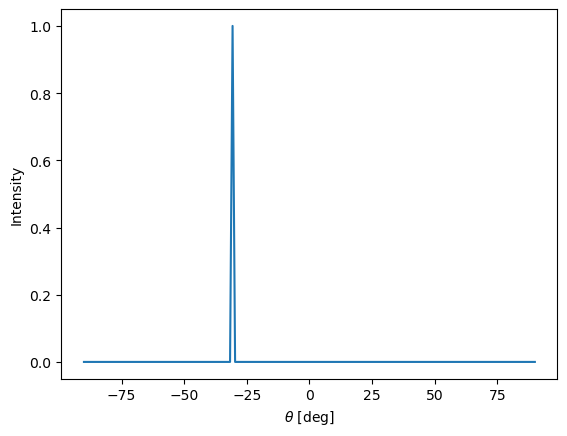

In [67]:
# 天体の空間分布をプロット
theta = np.linspace(90,-90,N) 

plt.plot(theta,object_distribution) # グラフを描画
plt.xlabel("$θ$ [deg]") # x軸のラベルを指定
plt.ylabel("Intensity") # y軸のラベルを指定
plt.show() # グラフを表示

In [85]:
# マスクと検出器の距離
l = 5

# 検出器の中心からどれだけズレた位置からマスクの影が始まるか（値は四捨五入して整数にする）
d = round(l * np.tan(np.deg2rad(90-120)) - round(mask_length / 2))
# print(d)

# 検出器の端からマスクの影が始まる位置までの距離
d_result = round(detector_length / 2) + d 
# print(d_result)

# d_result番目のインデックスからmaskを足す
detector[d_result:d_result + mask_length] += mask

detector_image = detector
# print(detector_image)
# print(len(detector_image))


In [87]:
# 検出器イメージの右端にマスクの長さ数分の0を追加（端に光が当たったときのため）
detector_image = np.insert(detector_image, len(detector_image), [0] * mask_length)
detector_image_length = len(detector_image)
# print(detector_image)
# print(len(detector_image))

In [88]:
# マスクと検出器イメージの相関を計算
correlation = []

for i in range(detector_image_length - mask_length):
    inner_product = np.sum(mask * detector_image[i:i+mask_length]) # i番目からi+mask_length番目までの要素を取り出して内積を計算
    correlation.append(inner_product)

correlation_result = np.array(correlation)
print(correlation_result)
print(len(correlation_result))

[6. 3. 0. ... 0. 0. 0.]
3000


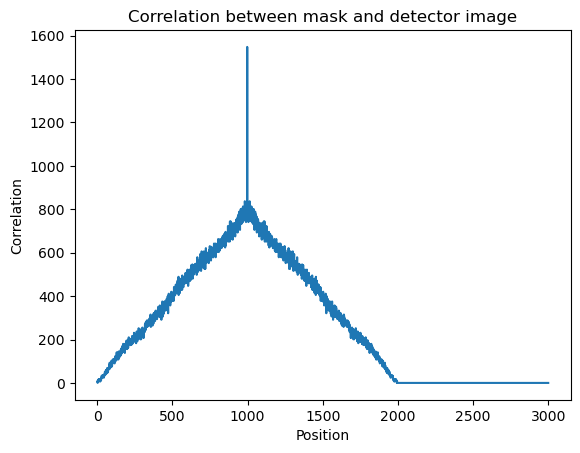

In [89]:
plt.plot(correlation_result)
plt.xlabel("Position")
plt.ylabel("Correlation")
plt.title("Correlation between mask and detector image")
plt.show()

[-89.71352349 -89.71323673 -89.7129494  ...  89.85654567  89.85661747
  89.85668919]


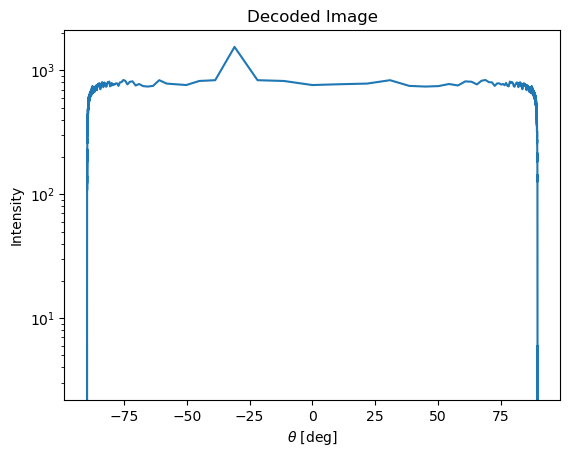

In [90]:
x = np.arange(0, detector_length, 1)
# print(x)
# print(len(x))

# 角度に変換
theta = np.rad2deg(np.arctan((x - round(detector_length / 2)+round(mask_length / 2)) / l))
print(theta)

plt.plot(theta, correlation_result)
plt.xlabel("$θ$ [deg]") # x軸のラベルを指定
plt.ylabel("Intensity") # y軸のラベルを指定
plt.title("Decoded Image") # グラフのタイトルを指定
plt.yscale("log") # 対数グラフにする
plt.show() # グラフを表示

In [93]:
# Intensityが最大のときの角度を出力
theta_at_max_correlation_result = theta[np.argmax(correlation_result)]
print(theta_at_max_correlation_result)  

-30.96375653207352
